In [1]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sktime.utils.plotting.forecasting import plot_ys

In [2]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
from sktime.performance_metrics.forecasting import smape_loss

In [4]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [5]:
from sktime.datasets import load_airline

In [6]:
import matplotlib.pyplot as plt

In [7]:
airline = load_airline()

In [8]:
y_train,y_test = temporal_train_test_split(airline, test_size=36)

In [9]:
fh = list(range(1,37))

In [10]:
listOfRegressors = [DecisionTreeRegressor(), RandomForestRegressor(n_estimators=30),
                   LinearRegression(), KNeighborsRegressor(n_neighbors=2), 
                   SVR()]

In [11]:
list_of_smape = []

for regressor in listOfRegressors:
    reduced_reg = ReducedRegressionForecaster(regressor = regressor, window_length=10)
    reduced_reg.fit(y_train)
    y_pred = reduced_reg.predict(fh)
    list_of_smape.append(smape_loss(y_test, y_pred))

In [12]:
list_of_smape

[0.37368652313254036,
 0.15556823173657752,
 0.13640640534470158,
 0.1618894246890118,
 0.5466688695301318]

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24aa354deb8>)

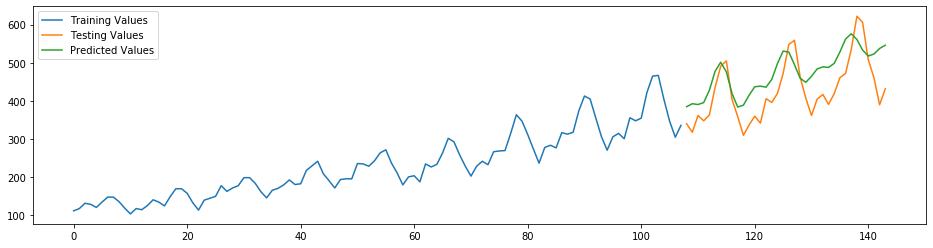

In [13]:
reduced_reg = ReducedRegressionForecaster(regressor = LinearRegression(), window_length=10)
reduced_reg.fit(y_train)
y_pred = reduced_reg.predict(fh)
plot_ys(y_train, y_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24aa2b28c18>)

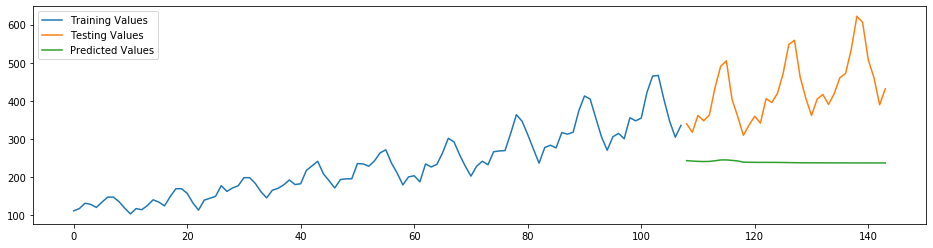

In [14]:
reduced_reg = ReducedRegressionForecaster(regressor = SVR(), window_length=10)
reduced_reg.fit(y_train)
y_pred = reduced_reg.predict(fh)
plot_ys(y_train, y_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])